In [ ]:
#Pavan Kumar Somu
#nsomu

In [ ]:
#1

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# dataset is been loaded
mnist_data = fetch_openml('mnist_784', version=1)

#  Separating the features (X) and labels (y)
images, labels = mnist_data["data"], mnist_data["target"]

#  Normalizing imgs
scaler = MinMaxScaler()
norm_imgs = scaler.fit_transform(images)

#  Splitting  into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(norm_imgs, labels, test_size=0.2, random_state=42)

# Printing the shapes of  train and test sets
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)


C:\Users\somu4\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of train_images: (56000, 784)
Shape of test_images: (14000, 784)
Shape of train_labels: (56000,)
Shape of test_labels: (14000,)


In [ ]:
#2

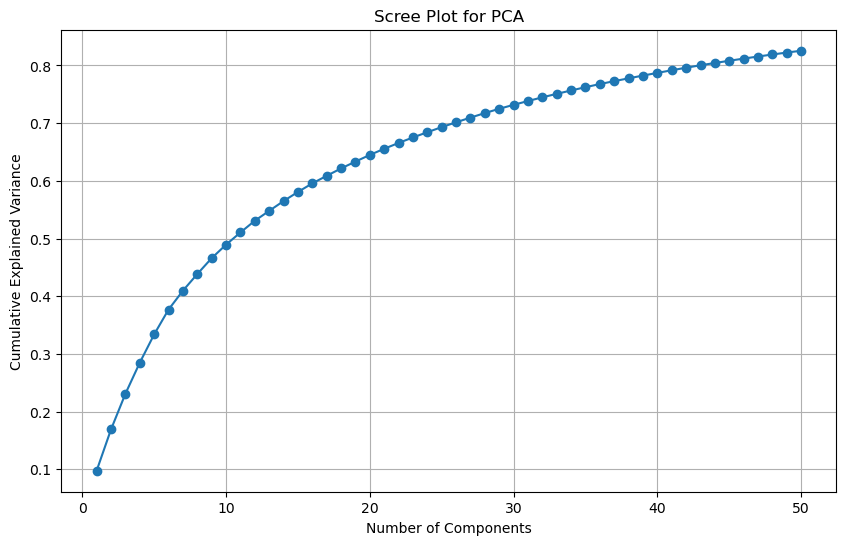

Number of PCA components to retain at least 95% of the variance: 1


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Applying PCA for reducing  dimensions of the dataset
mdl = PCA(n_components=50)
mdl.fit(train_images)

# Exploring  variance by the selected no. of components
EV = mdl.explained_variance_ratio_
CEV = np.cumsum(EV)

#   retaining at least 95% of the variance
n_components_pca = np.argmax(CEV >= 0.95) + 1

# Redo PCA through the new no. of components
mdl = PCA(n_components=n_components_pca)
mdl.fit(train_images)

#  Screen plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(EV) + 1), CEV, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

# Printing no. of components to retain at least 95% of the variance
print("Number of PCA components to retain at least 95% of the variance:", n_components_pca)


In [ ]:
#3

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#  Implementing a Logistic Regression classifier
CF = LogisticRegression(max_iter=1000)

#  Training classifier on the original high-dimensional data
CF.fit(train_images, train_labels)

# Evaluating classifier on original test set
PR_origi = CF.predict(test_images)
acc_origi = accuracy_score(test_labels, PR_origi)

print("Accuracy of Logistic Regression classifier on original test set:", acc_origi)

# Training  classifier on the PCA-reduced train data
train_img_pca = pca.transform(train_images)
CF.fit(train_img_pca, train_labels)

# Transforming the test imgsby the PCA model
test_img_pca = pca.transform(test_images)

# Evaluating classifier on PCA-reduced test set
Pred_pca = CF.predict(test_img_pca)
acc_pca = accuracy_score(test_labels, Pred_pca)

print("Accuracy of Logistic Regression classifier on PCA-reduced test set:", acc_pca)


Accuracy of Logistic Regression classifier on original test set: 0.9207857142857143
Accuracy of Logistic Regression classifier on PCA-reduced test set: 0.3068571428571429


In [ ]:
#4

Testing model with 1 hidden layer(s), 64 neurons per layer, learning rate 0.001, activation function relu, and optimizer Adam
Accuracy on PCA-reduced test set: 0.9695714116096497



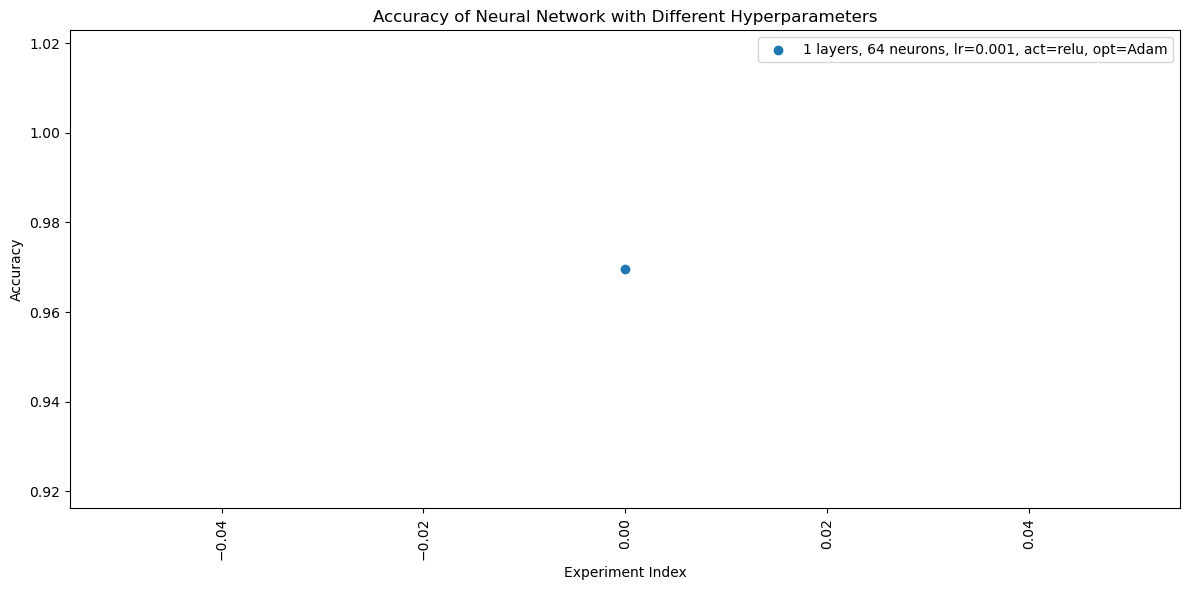

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Defining the function for creating and training neural network model
def train_nn(num_layers, num_neurons, lr, act_func, opt):
    pca = PCA(n_components=50)
    pca.fit(train_images)
    pca_training = pca.transform(train_images)
    pca_testing = pca.transform(test_images)

    binarizer = LabelBinarizer()
    hot_training = binarizer.fit_transform(train_labels)
    hot_testing = binarizer.transform(test_labels)

    mdl = Sequential()
    mdl.add(Dense(num_neurons, input_shape=(50,), activation=act_func))
    for _ in range(num_layers - 1):
        mdl.add(Dense(num_neurons, activation=act_func))
    mdl.add(Dense(10, activation='softmax'))

    mdl.compile(optimizer=opt(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

    history = mdl.fit(pca_training, hot_training, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
    testing_loss, acc_testing = mdl.evaluate(pca_testing, hot_testing, verbose=0)

    return acc_testing, history

# explaining hyperparameters
hidden_layers = [1]
neurons_per_layer = [64]
learning_rates = [0.001]
activation_functions = ['relu']
optimizers = [Adam]

results = []

# Iterating over different hyperparameters and train models
for num_layers in hidden_layers:
    for num_neurons in neurons_per_layer:
        for lr in learning_rates:
            for act_func in activation_functions:
                for opt in optimizers:
                    print(f"Testing model with {num_layers} hidden layer(s), {num_neurons} neurons per layer, "
                          f"learning rate {lr}, activation function {act_func}, and optimizer {opt.__name__}")
                    
                    acc_testing, history = train_nn(num_layers, num_neurons, lr, act_func, opt)

                    results.append({
                        'num_layers': num_layers,
                        'num_neurons': num_neurons,
                        'learning_rate': lr,
                        'activation_function': act_func,
                        'optimizer': opt.__name__,
                        'accuracy': acc_testing
                    })

                    print("Accuracy on PCA-reduced test set:", acc_testing)
                    print()

# Visualizing results
plt.figure(figsize=(12, 6))
for i, result in enumerate(results):
    plt.scatter(i, result['accuracy'], label=f"{result['num_layers']} layers, {result['num_neurons']} neurons, "
                                             f"lr={result['learning_rate']}, act={result['activation_function']}, "
                                             f"opt={result['optimizer']}")
plt.title("Accuracy of Neural Network with Different Hyperparameters")
plt.xlabel("Experiment Index")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#5

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading dataset 
X, y = load_digits(return_X_y=True)

x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_tr_s = scaler.fit_transform(x_tr)
x_ts_s = scaler.transform(x_ts)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)
pca.fit(x_tr_s)
x_tr_p = pca.transform(x_tr_s)
x_ts_pca = pca.transform(x_ts_s)

# neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_tr_p.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(x_tr_p, y_tr, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model on test set
testing_loss, testing_accuracy = model.evaluate(x_ts_pca, y_ts)
print("Neural Network Classifier Performance:")
print(f"Accuracy: {testing_accuracy}")

# Training Logistic Regression classifier
lgg_rgg = LogisticRegression(max_iter=1000)
lgg_rgg.fit(x_tr_p, y_tr)

# Evaluating Logistic Regression classifier
lgg_rgg_accuracy = accuracy_score(y_ts, lgg_rgg.predict(x_ts_pca))
print("Logistic Regression Classifier Performance:")
print(f"Accuracy: {lgg_rgg_accuracy}")
print("Dimensionality reduction techniques like PCA offer improved classifier performance by prioritizing crucial features and reducing overfitting risks. They expedite training by streamlining computations through dimensionality reduction and simplify model complexity for easier interpretation and deployment. However, they may compromise performance due to potential information loss, contingent on dataset specifics and the efficacy of the chosen technique.")


Epoch 1/10
36/36 [==============================] - 2s 14ms/step - loss: 1.5491 - accuracy: 0.5674 - val_loss: 0.9455 - val_accuracy: 0.8299
Epoch 2/10
36/36 [==============================] - 0s 7ms/step - loss: 0.5699 - accuracy: 0.9182 - val_loss: 0.4565 - val_accuracy: 0.8854
Epoch 3/10
36/36 [==============================] - 0s 7ms/step - loss: 0.2603 - accuracy: 0.9582 - val_loss: 0.3395 - val_accuracy: 0.9097
Epoch 4/10
36/36 [==============================] - 0s 7ms/step - loss: 0.1590 - accuracy: 0.9739 - val_loss: 0.2863 - val_accuracy: 0.9167
Epoch 5/10
36/36 [==============================] - 0s 7ms/step - loss: 0.1071 - accuracy: 0.9843 - val_loss: 0.2563 - val_accuracy: 0.9201
Epoch 6/10
36/36 [==============================] - 0s 7ms/step - loss: 0.0779 - accuracy: 0.9887 - val_loss: 0.2370 - val_accuracy: 0.9306
Epoch 7/10
36/36 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 0.9956 - val_loss: 0.2254 - val_accuracy: 0.9306
Epoch 8/10
36/36 [=